# TP1 BIG DATA

**On commence par les importations de rigueur**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Expérience 1:**

**On définit la fonction f**

In [2]:
def f(g,s,x):
    n=g.shape[0]
    return np.sum([np.exp(-np.linalg.norm(x-g[i-1])**2/(2*s[i-1]**2)) for i in range(1,n+1)])

**On prépare un jeu de données tests généré aléatoirement**

In [3]:
n=4
a=0.3
g=np.random.uniform(size=[n,2])
s=np.random.uniform(low=0,high=a,size=n)
x=np.random.uniform(size=2)

**On peut tester f**

In [4]:
f(g,s,x)

0.5832709898416055

**Question 1:**

**La fonction suivante prend en entrée une liste d'abscisses $X_{1}$, une liste d'ordonnées $X_{2}$ et des paramètres $g$ et $s$. Elle renvoie une liste de même taille dans laquelle l'élément d'indice $i$ vaut $1$ si $(X_{1}[i],X_{2}[i]) \in A$ et $-1$ sinon** 

In [5]:
def intens(X1,X2,g,s):
    m=X1.shape[0]
    result=-1*np.ones(m)
    for i in range(m):
        t=X1[i]
        w=X2[i]
        #print("t=",t)
        #print("w=",w)
        #print("n=",n)
        #print("g.shape=",g.shape)
        #print("s.shape=",s.shape)
        if (f(g,s,np.array([t,w])))>1/2:
            result[i]=1
    return result
        

In [6]:
X1,X2=np.mgrid[0:1:1/n**2,0:1:1/n**2]
X1=X1.reshape(-1,)
#print("X1.shape=",X1.shape)
X2=X2.reshape(-1,)

In [7]:
intens(X1,X2,g,s).shape

(256,)

**Question 2:**

**La fonction suivante génére un tirage de paramètres $g$ et $s$ en fonction des valeurs fixées de $n$ et $a$ Si $flag$ vaut $1$ elle fait en plus un affichage grossier de l'ensemble A considéré**

In [8]:
def ensalea(n,a,flag=0):
    g=np.random.uniform(size=[n,2])
    s=np.random.uniform(low=0,high=a,size=n)
    if flag==1:
        xA=[]
        yA=[]
        X1,X2=np.mgrid[0:1:1/n**3,0:1:1/n**2]
        X1=X1.reshape(-1,)
        #print("X1.shape=",X1.shape)
        X2=X2.reshape(-1,)
        #print("X2.shape=",X2.shape)
        Y=intens(X1,X2,g,s)
        
        for i in range(Y.shape[0]):
            if Y[i]==1:
                xA.append(X1[i])
                yA.append(X2[i])
        plt.scatter(xA,yA,color='r');
    return (g,s)

**Question 3:**

**On utilise la fonction qu'on vient d'implémenter pour fixer un ensemble $A$ que notre modèle s'efforcera de prédire (on pourra réexécuter plusieurs fois la cellule suivante pour obtenir un ensemble à son goût)** 

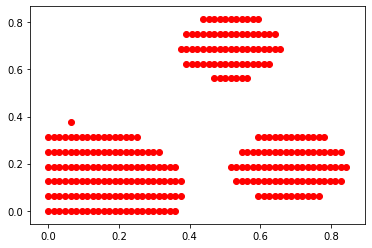

In [9]:
n=4
a=0.3
(g,s)=ensalea(n,a,1)

**Question 4:**

**On génére un échantillon d'apprentissage de taille $l$ constitué d'une liste d'abscisses $X_{1}$, une liste d'ordonnées $X_{2}$ et la liste $Y$ des labels associée aux points considérés**

In [10]:
def echant(l,g,s):
    X1=np.random.uniform(size=l)
    X2=np.random.uniform(size=l)
    Y=intens(X1,X2,g,s)
    return [X1,X2,Y]

In [11]:
l=100000
[X1,X2,Y]=echant(l,g,s)

**Question 5:**

**La fonction suivante prend en entrée deux indices $i$ et $j$, un point $(x1,x2)$ et un entier $p$.                     
Elle renvoie $1$ si $(x1,x2) \in c_{i,j}$ dans le découpage à $p^{2}$ carreaux et $0$ sinon**

In [12]:
def est_dans_c(i,j,x1,x2,p):
    return int((i/p<=x1<=(i+1)/p) and (j/p<=x2<=(j+1)/p))

**La fonction suivante prend en entrée un point $(x1,x2)$ et un entier $p$.        
Elle renvoie le couple d'indices $(i,j)$ tel que $(x1,x2) \in c_{i,j}$ dans le découpage à $p^{2}$ carreaux**

In [13]:
def carreau(x1,x2,p):
    return (int(p*x1),int(p*x2))

**Ces deux fonctions dans la fonction $estens$. Cette dernière prend en entrée un échantillon d'apprentissage $(X1,X2,Y)$ et un entier $p$. Elle renvoie une matrice $B$ de taille $p \times p$ et un scalaire $Re$ définis par:**         
 * $B(i,j)=1$ si $\hat{l_{ij}^{+}} \ge \hat{l_{ij}^{-}}$ et $0$ sinon       
 * $Re=\hat{R_{p}^{*}}$                        
 **B code l'ensemble des $c_{ij}$ participant à la construction de $\hat{C_p}$       
 Lorsque le paramètre $trace$ vaut $1$ dans la fonction on fait un affichage de $B$**

In [14]:
def estens(X1,X2,Y,p,trace=1):
    l=X1.shape[0]
    B=np.zeros((p,p))
    R=0
    for i in range(p):
        for j in range(p):#pour chaque carreau
            l_p=0
            l_m=0
            for k in range(l):#pour chaque élément de l'échantillon d'apprentissage
                if est_dans_c(i,j,X1[k],X2[k],p): #s'il est dans le carreau courant
                    if Y[k]==1:#s'il est aussi dans A
                        l_p+=1 #on incrémente l_p
                    else: #s'il n'est pas dans A
                        l_m+=1 #on incrémente l_m
            if l_p>=l_m: #pour chaque carreau c(i,j) où l_p est supérieur à l_m, B[i,j] prend la valeur 1
                B[p-j-1,i]=1
            #sinon B[i,j] reste à 0
    for k in range(l): #pour chaque élément de l'echantillon d'appprentissage
        (i,j)=carreau(X1[k],X2[k],p) #on détermine le carreau auquel il appartient
        if ((B[i,j]==1 and Y[k]==-1) or (B[i,j]==0 and Y[k]==1)): #si ce carreau code pour C_chap_p alors qu'en vérité l'élément n'appartient pas à A ou inversement
            R+=1 #on incrémente R
    R=R/l #on renverra la proportion d'éléments sur lesquels on s'est trompés
    if trace:
        plt.imshow(B,cmap='magma') #dans l'affichage les cases claires correspondent aux 1 et les noires aux 0
        plt.show()
    return (B,R)

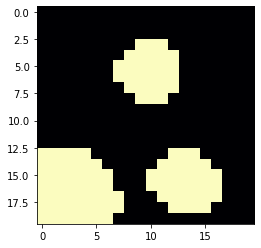

In [15]:
(B,R)=estens(X1,X2,Y,20,trace=1)

**On peut noter la proximité entre $B$ et l'ensemble considéré $A$**

**On termine cette partie en affichant le risque**

In [16]:
print("Le risque empirique associé au classifieur optimal vaut:",R*100,"%")

Le risque empirique associé au classifieur optimal vaut: 44.823 %


**Question 6:**

**La fonction suivante approche la valeur de $R(1_{\hat{C}_{p}})$ par $R'_{emp}(1_{\hat{C}_{p}})$ sur un échantillon indépendant de l'échantillon d'apprentissage**

In [17]:
def testens(B,m,g,s):
    p=B.shape[0]
    #on génére un nouvel échantillon de taille m indépendant de l'échantillon d'apprentissage
    X1=np.random.uniform(size=m)
    X2=np.random.uniform(size=m)
    Y=intens(X1,X2,g,s)
    #on initialise le risque à 0
    R=0
    
    for k in range(m): #on parcourt tous les individus du nouvel échantillon
        (i,j)=carreau(X1[k],X2[k],p)
        #si un élément est dans C_p_chap mais pas dans A ou inversement
        if (B[i,j]==1 and Y[k]==-1) or (B[i,j]==0 and Y[k]==1):
            #on incrémente R
            R+=1
    #on renvoie la proportion d'erreur
    return R/m

In [22]:
m=4612
liste_risque=[]
for i in range(100):
    liste_risque.append(testens(B,m,g,s))

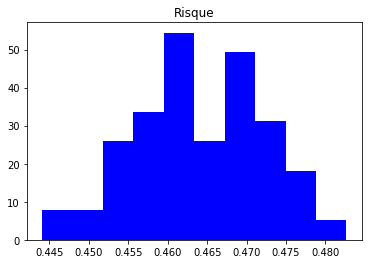

In [24]:
plt.hist(liste_risque,color='b',density=True)
plt.title("Risque");

**Question 7:**

In [29]:
eta=0.05
eps=0.02
m0=int(-np.log(eta/2)/(2*eps**2))+1
m0

4612

l= 100
min_p= 2


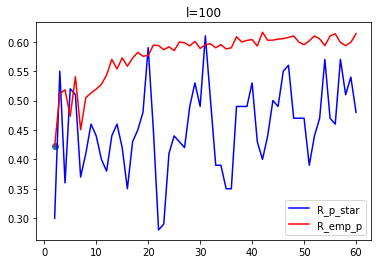

l= 500
min_p= 60


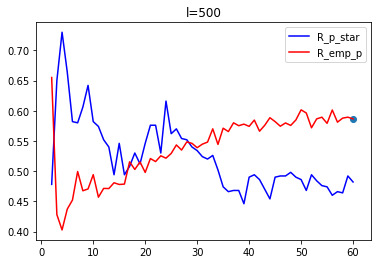

l= 1000
min_p= 2


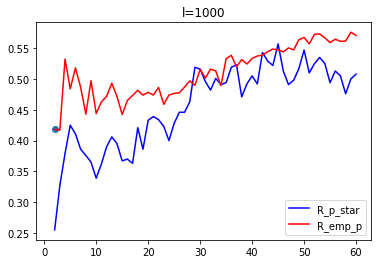

l= 10000
min_p= 2


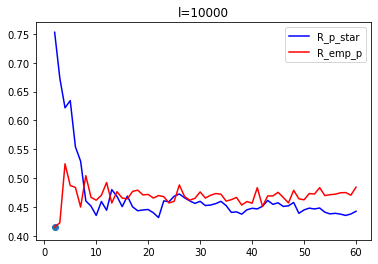

In [35]:
liste_l=[100,500,1000,10000]
liste_p=np.arange(2,61)
for l in liste_l:
    print("l=",l)
    [X1,X2,Y]=echant(l,g,s)
    R_p_star=[]
    R_emp_p=[]
    for p in liste_p:
        #print("p=",p)
        min_p=2
        [B,Re]=estens(X1,X2,Y,p,trace=0)
        R_p_star.append(Re)
        R_emp_p.append(testens(B,m0,g,s))
        if R_emp_p[-1]<R_emp_p[min_p-2]:
            min_p=len(R_emp_p)+1
    print("min_p_chap=",min_p)
    plt.plot(liste_p,R_p_star,label="R_p_star",color='b')
    plt.plot(liste_p,R_emp_p,label="R_emp_p",color='r')
    plt.scatter(min_p,R_emp_p[min_p-2],marker='plus',label='min_p_chap')
    plt.title("l="+str(l))
    plt.legend()
    plt.show()

**Question 8:**

**Pour de petites valeurs de $l$, on peut voir que le risque de population est très oscillant et que le risque de l'échantillon est très élevé.**


# FIN

**Fait par Youness Khanjar M2MAPI3**